<a href="https://colab.research.google.com/github/ebarriosc1/Efield-Classification/blob/master/Classification__Electrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pylab as lab
from tensorflow import keras
import tensorflow as tf
from keras.utils import np_utils
import random


In [69]:
def generator(num_images):
  #removed the plots in order to reiterate a high number of times
  u =[]
  v =[]
  uu = []
  vv =[]
  qq = []
  for iter in range(num_images):
      L = 20 # Number of points in x-coordinate and y-coordinate each


      a, b = np.arange(0, L, 1), np.arange(0, L, 1)
      X , Y = np.meshgrid(a, b)


      Ex = np.zeros([L,L])         # 2D array to store the Ex and
      Ey = np.zeros([L,L])         # Ey components


      #will need to create a list of random locations for the charges
      #nq = random.choice([1,2])
      nq = random.randint(1,4)
      qq.append(nq)
      Q = [[],[]]
      for rand_variable in range(nq):
          q = random.choice([-1,1]) #indicates charge is poistive or negative
          qx = random.randrange(1,L) #indicates the positions of the charge in the x^hat
          qy = random.randrange(1,L) #indicates the positions of the charge in the y^hat
          Q[0].append(qy)
          Q[1].append(qx)
          for i in range(L): # calculate Ex and Ey at each point in the grid, due to all charges
              for j in range(L):
                  denom = ((i - qx) ** 2.0 + (j - qy) ** 2.0)**1.5
                  if denom != 0:
                      Ex[i,j] += (q * (j - qy))/ denom
                      Ey[i,j] += (q * (i - qx))/ denom
      u.append(Ex)
      v.append(Ey)
      vv.append(qy)
      uu.append(qx)
  ex = []
  ey = []
  for i in range(len(u)):
      #ex.append(uu[i])
      #ey.append(vv[i])
      for j in range(20):
          for k in range(20):
              ex.append(u[i][j][k])
              ey.append(v[i][j][k])
  ex = lab.asarray(ex)
  X = ex.reshape(num_images,400)
  num_charge = []
  for i in range(len(qq)):
      num_charge.append(qq[i])
      #for i in range(399):
      #   num_charge.append(0)
  return num_charge, X

In [70]:
num_images = 5000

labels, data = generator(num_images)

In [71]:
labels = np.array(labels)

In [72]:
data = data.reshape(num_images, 20,20,1)

In [73]:
data = data.astype(np.float32)

In [74]:
#Splitting Data into Train and Test
split_percent = int(len(data)* 0.8)

X_train = data[:split_percent]
X_test = data[split_percent:]

num_charge_train = labels[:split_percent]
num_charge_test = labels[split_percent:]

In [75]:
#One-hot encoding will be applied:
#Lets use numpy command to_categorical() to one-hot encode
num_charge_train = np_utils.to_categorical(num_charge_train)
num_charge_test = np_utils.to_categorical(num_charge_test)


In [76]:
from tensorflow.keras import layers, Sequential

model = Sequential()

# Input layer
model.add(layers.Input(shape=(20, 20, 1)))

# Convolutional layers
model.add(layers.Conv2D(32, 3, activation='relu', padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

# Flatten layer
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Fully connected layers
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())

# Output layer
model.add(layers.Dense(num_charge_train.shape[1], activation='softmax'))  # Change num_classes to your number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 20, 20, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 20, 20, 32)        0         
                                                                 
 batch_normalization_16 (Bat  (None, 20, 20, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 10, 10, 64)       

In [78]:
np.random.seed(123)
history = model.fit(X_train, num_charge_train, epochs=5, batch_size=10)


Epoch 1/5
400/400 [==============================] - 7s 6ms/step - loss: 1.0581 - accuracy: 0.5740
Epoch 2/5
400/400 [==============================] - 2s 6ms/step - loss: 0.6790 - accuracy: 0.7128
Epoch 3/5
400/400 [==============================] - 3s 7ms/step - loss: 0.6351 - accuracy: 0.7345
Epoch 4/5
400/400 [==============================] - 2s 6ms/step - loss: 0.6006 - accuracy: 0.7455
Epoch 5/5
400/400 [==============================] - 2s 6ms/step - loss: 0.6422 - accuracy: 0.7268


In [79]:
# Generate generalization metrics
score = model.evaluate(X_test, num_charge_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.3063032627105713 / Test accuracy: 0.9710000157356262


In [80]:
model.predict(X_test[0:1])

1/1 [==============================] - 0s 118ms/step


array([[0.00120762, 0.00121759, 0.10484059, 0.6042164 , 0.28851783]],
      dtype=float32)

In [82]:
num_charge_test[0:1]

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [83]:
num_charge_test_encoded = model.predict(X_test[0:1])
num_charge_test_original = np.argmax(num_charge_test_encoded, axis=1)
num_charge_test_original

1/1 [==============================] - 0s 19ms/step


array([3])

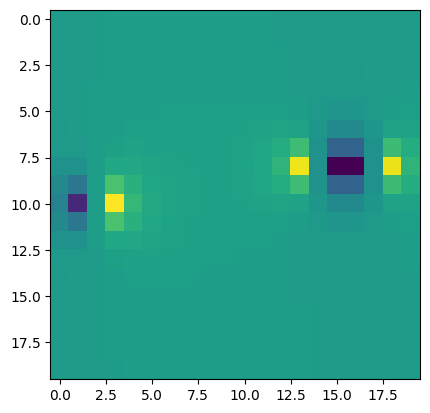

In [90]:
lab.imshow(X_test[0])
lab.show()